In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import setup, compare_models

ModuleNotFoundError: No module named 'pycaret'

Import para os modelos preditivos

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('df.csv', delimiter=",")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Análise Exploratória dos Créditos oncedidos pelo Banco

## Primeiro vamos transformar os valores de texto para número

In [6]:
colunas_para_converter = ["person_gender", "person_education", "person_home_ownership"
                          "loan_intent", "previous_loan_defaults_on_file"]

### Conversão da Coluna "person_gender"
#### Mulher = 0 e Homem = 1

In [7]:
df['person_gender'] = df['person_gender'].apply(lambda x: 0 if x == 'female' else 1 if x == 'male' else None)

### Conversão da Coluna "person_education"
#### High School = 0, Bachelor = 1, Master = 2, Doctorate = 3 e Associate = 4

In [8]:
education_map = {
    'High School': 0,
    'Bachelor': 1,
    'Master': 2,
    'Doctorate': 3,
    'Associate': 4
}

df['person_education'] = df['person_education'].map(education_map)

### Conversão da Coluna "person_home_ownership"
#### OWN = 0, RENT = 1, MORTGAGE = 2 e OTHER = 3

In [9]:
home_map = {
    'OWN': 0,
    'RENT': 1,
    'MORTGAGE': 2,
    'OTHER': 3
}

df['person_home_ownership'] = df['person_home_ownership'].map(home_map)

### Conversão da Coluna "loan_intent"
#### EDUCATION = 0, MEDICAL = 1, VENTURE = 2, PERSONAL = 3, DEBTCONSOLIDATION = 4 e HOMEIMPROVEMENT = 5

In [10]:
loan_intent_map = {
    'EDUCATION': 0,
    'MEDICAL': 1,
    'VENTURE': 2,
    'PERSONAL': 3,
    'DEBTCONSOLIDATION': 4,
    'HOMEIMPROVEMENT': 5
}

df['loan_intent'] = df['loan_intent'].map(loan_intent_map)

### Conversão da Coluna "previous_loan_defaults_on_file"
#### No = 0 e Yes = 1

In [11]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].apply(lambda x: 0 if x == 'No' else 1 if x == 'Yes' else None)

In [12]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,2,71948.0,0,1,35000.0,3,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,0,1000.0,0,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,2,5500.0,1,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,1,35000.0,1,15.23,0.44,2.0,675,0,1
4,24.0,1,2,66135.0,1,1,35000.0,1,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,4,47971.0,6,1,15000.0,1,15.66,0.31,3.0,645,0,1
44996,37.0,0,4,65800.0,17,1,9000.0,5,14.07,0.14,11.0,621,0,1
44997,33.0,1,4,56942.0,7,1,2771.0,4,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,1,12000.0,0,13.23,0.36,6.0,604,0,1


## Análise exploratória

## Entendendo o perfil de quem pega empréstimo

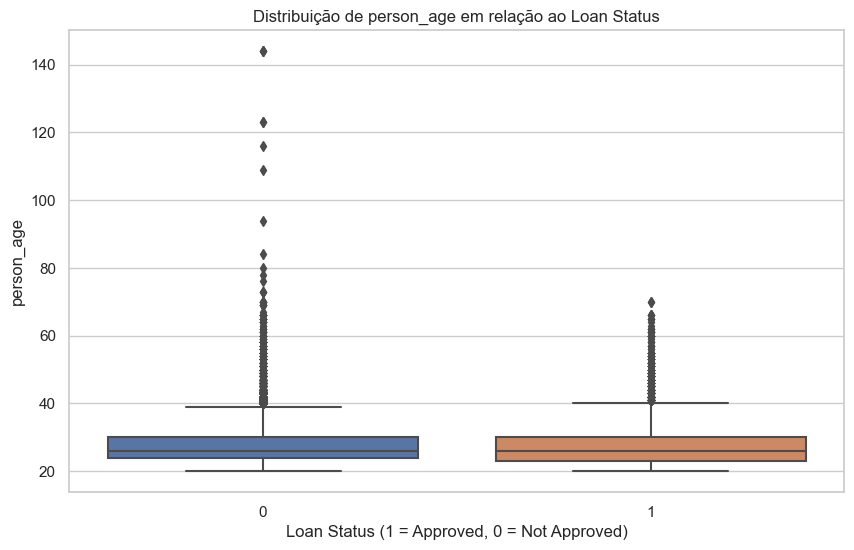

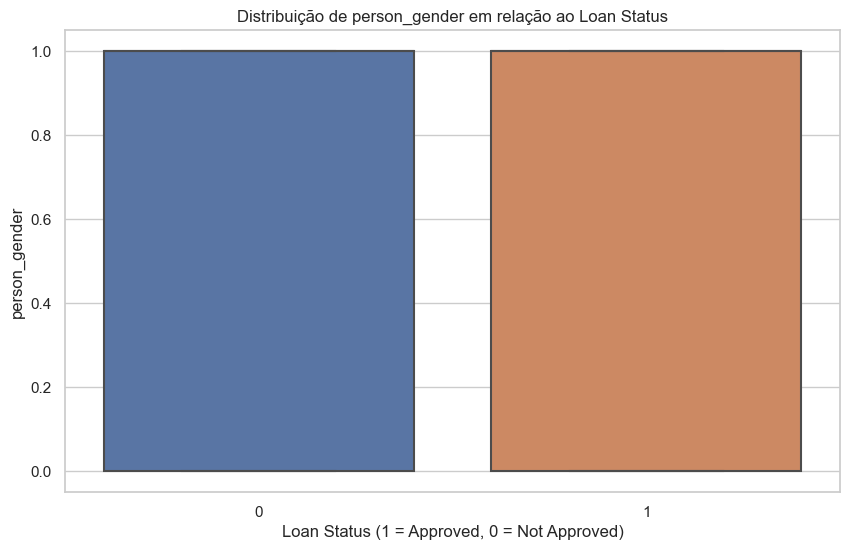

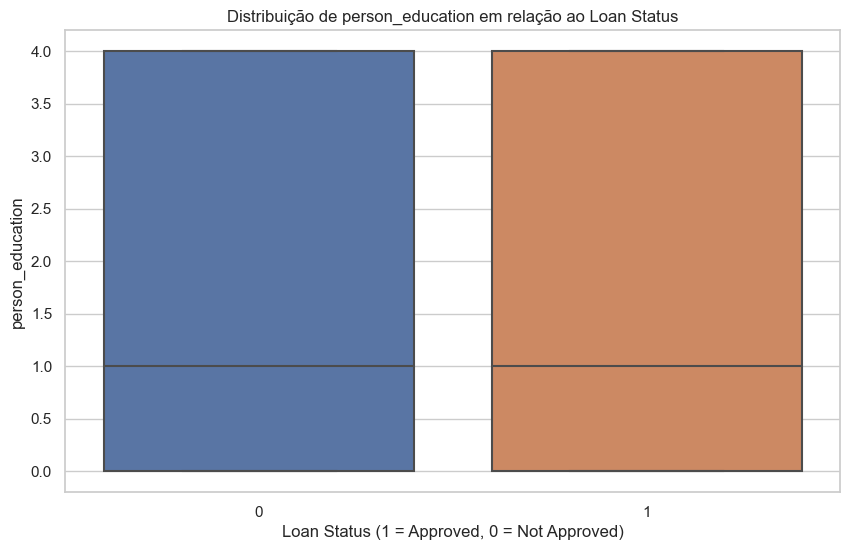

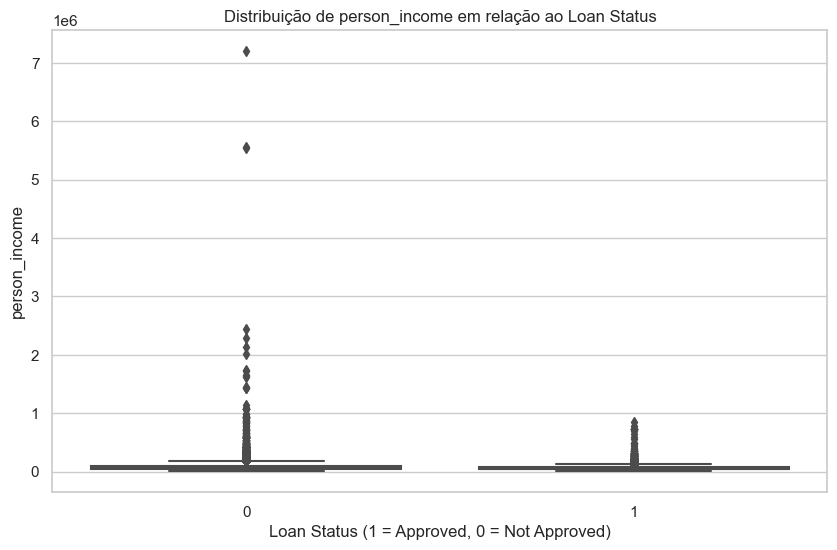

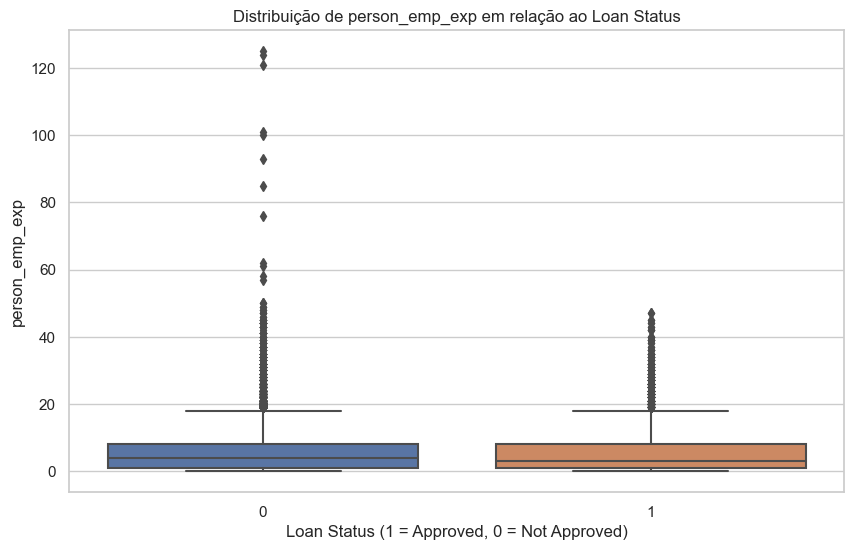

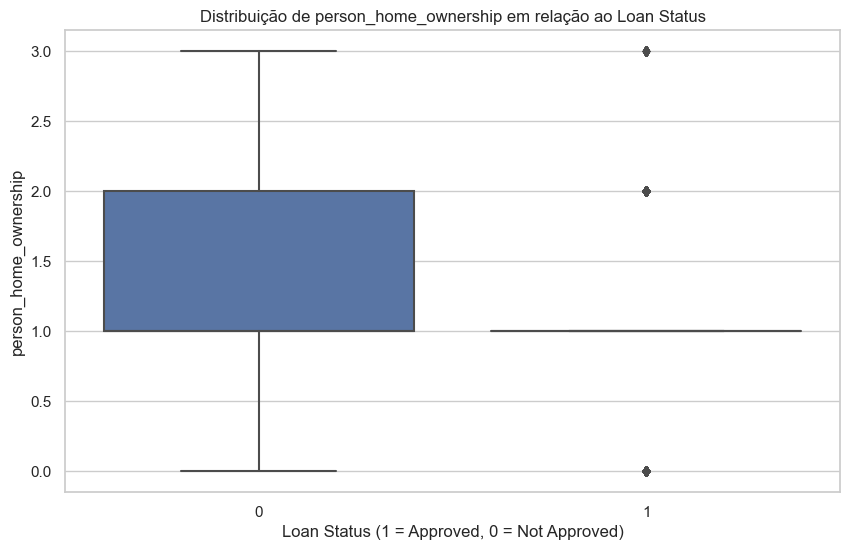

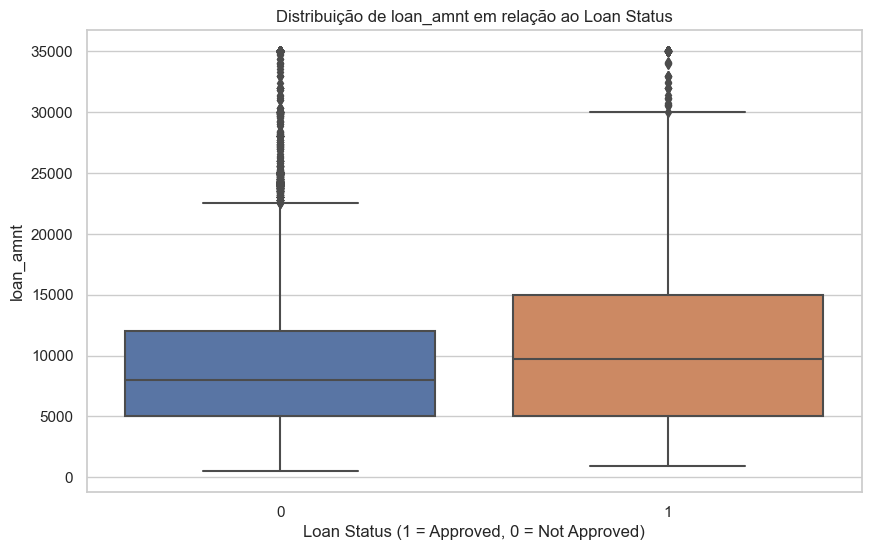

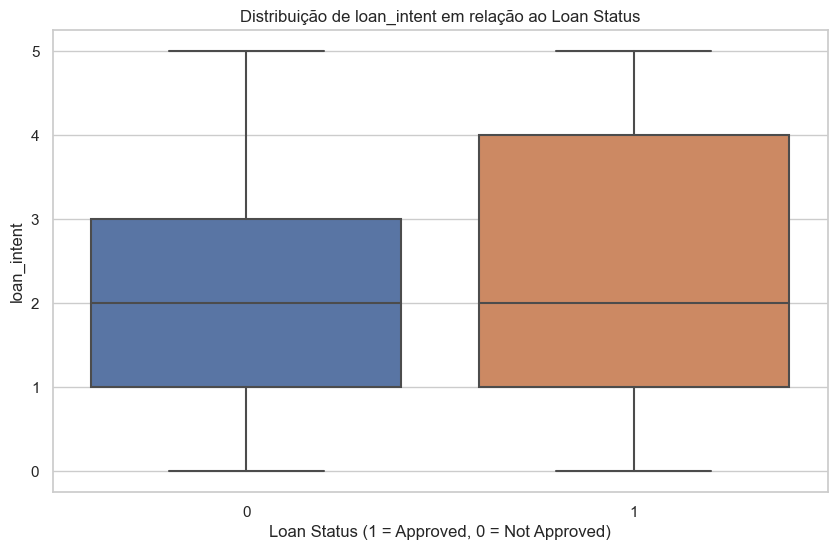

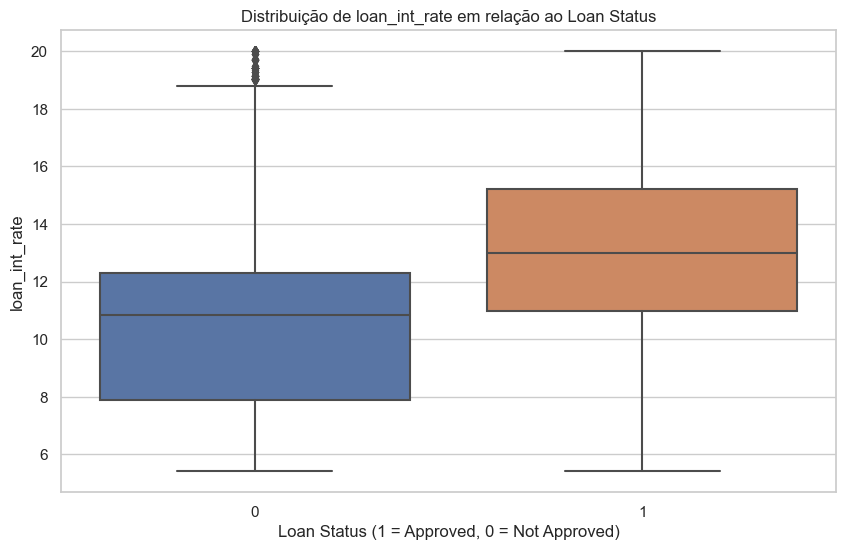

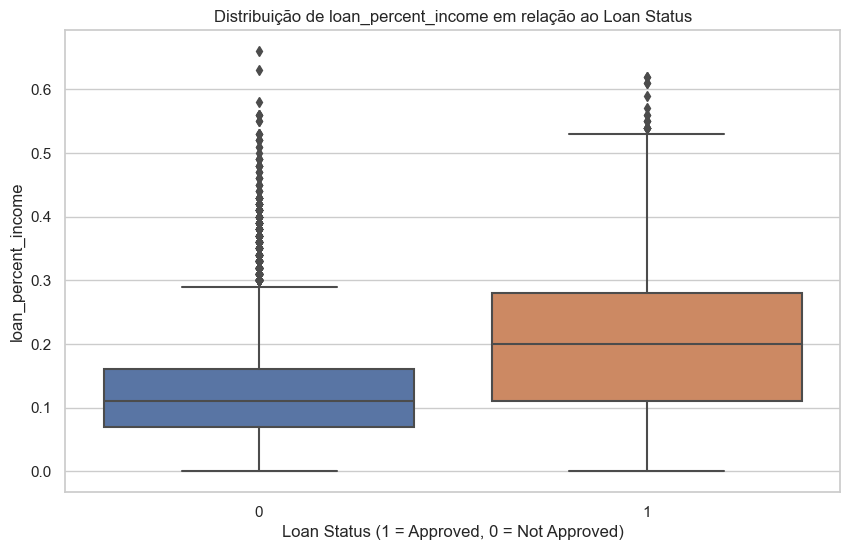

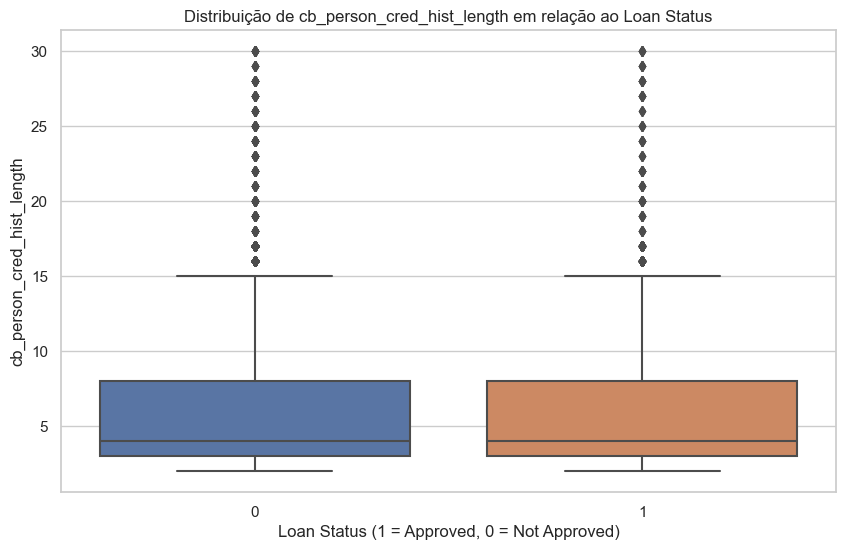

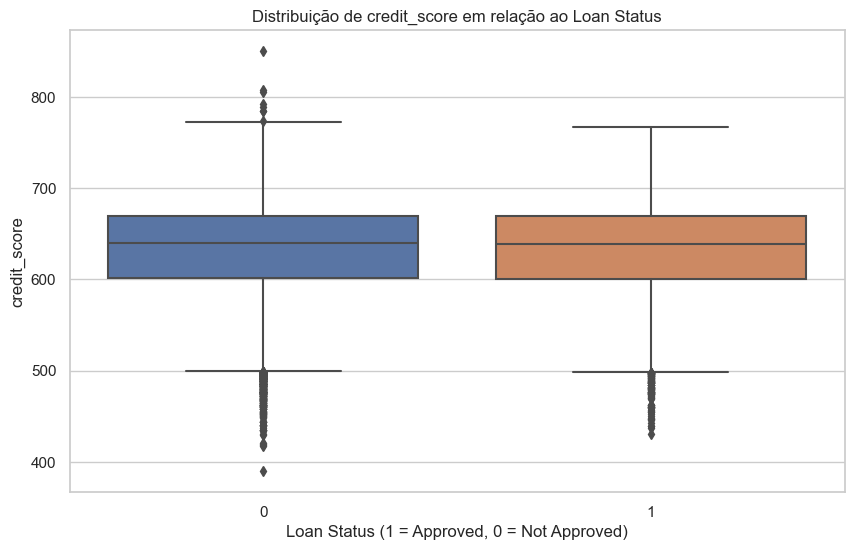

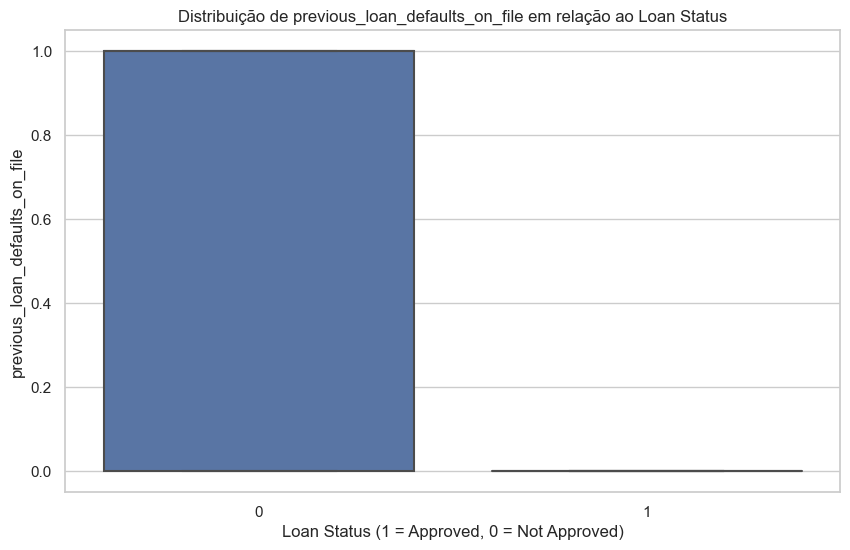

In [13]:
colunas = [col for col in df.columns if col != 'loan_status']

# Configura o estilo do gráfico
sns.set(style="whitegrid")

# Cria gráficos para cada coluna em relação ao 'loan_status'
for coluna in colunas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='loan_status', y=coluna)
    plt.title(f'Distribuição de {coluna} em relação ao Loan Status')
    plt.xlabel('Loan Status (1 = Approved, 0 = Not Approved)')
    plt.ylabel(coluna)
    plt.show()

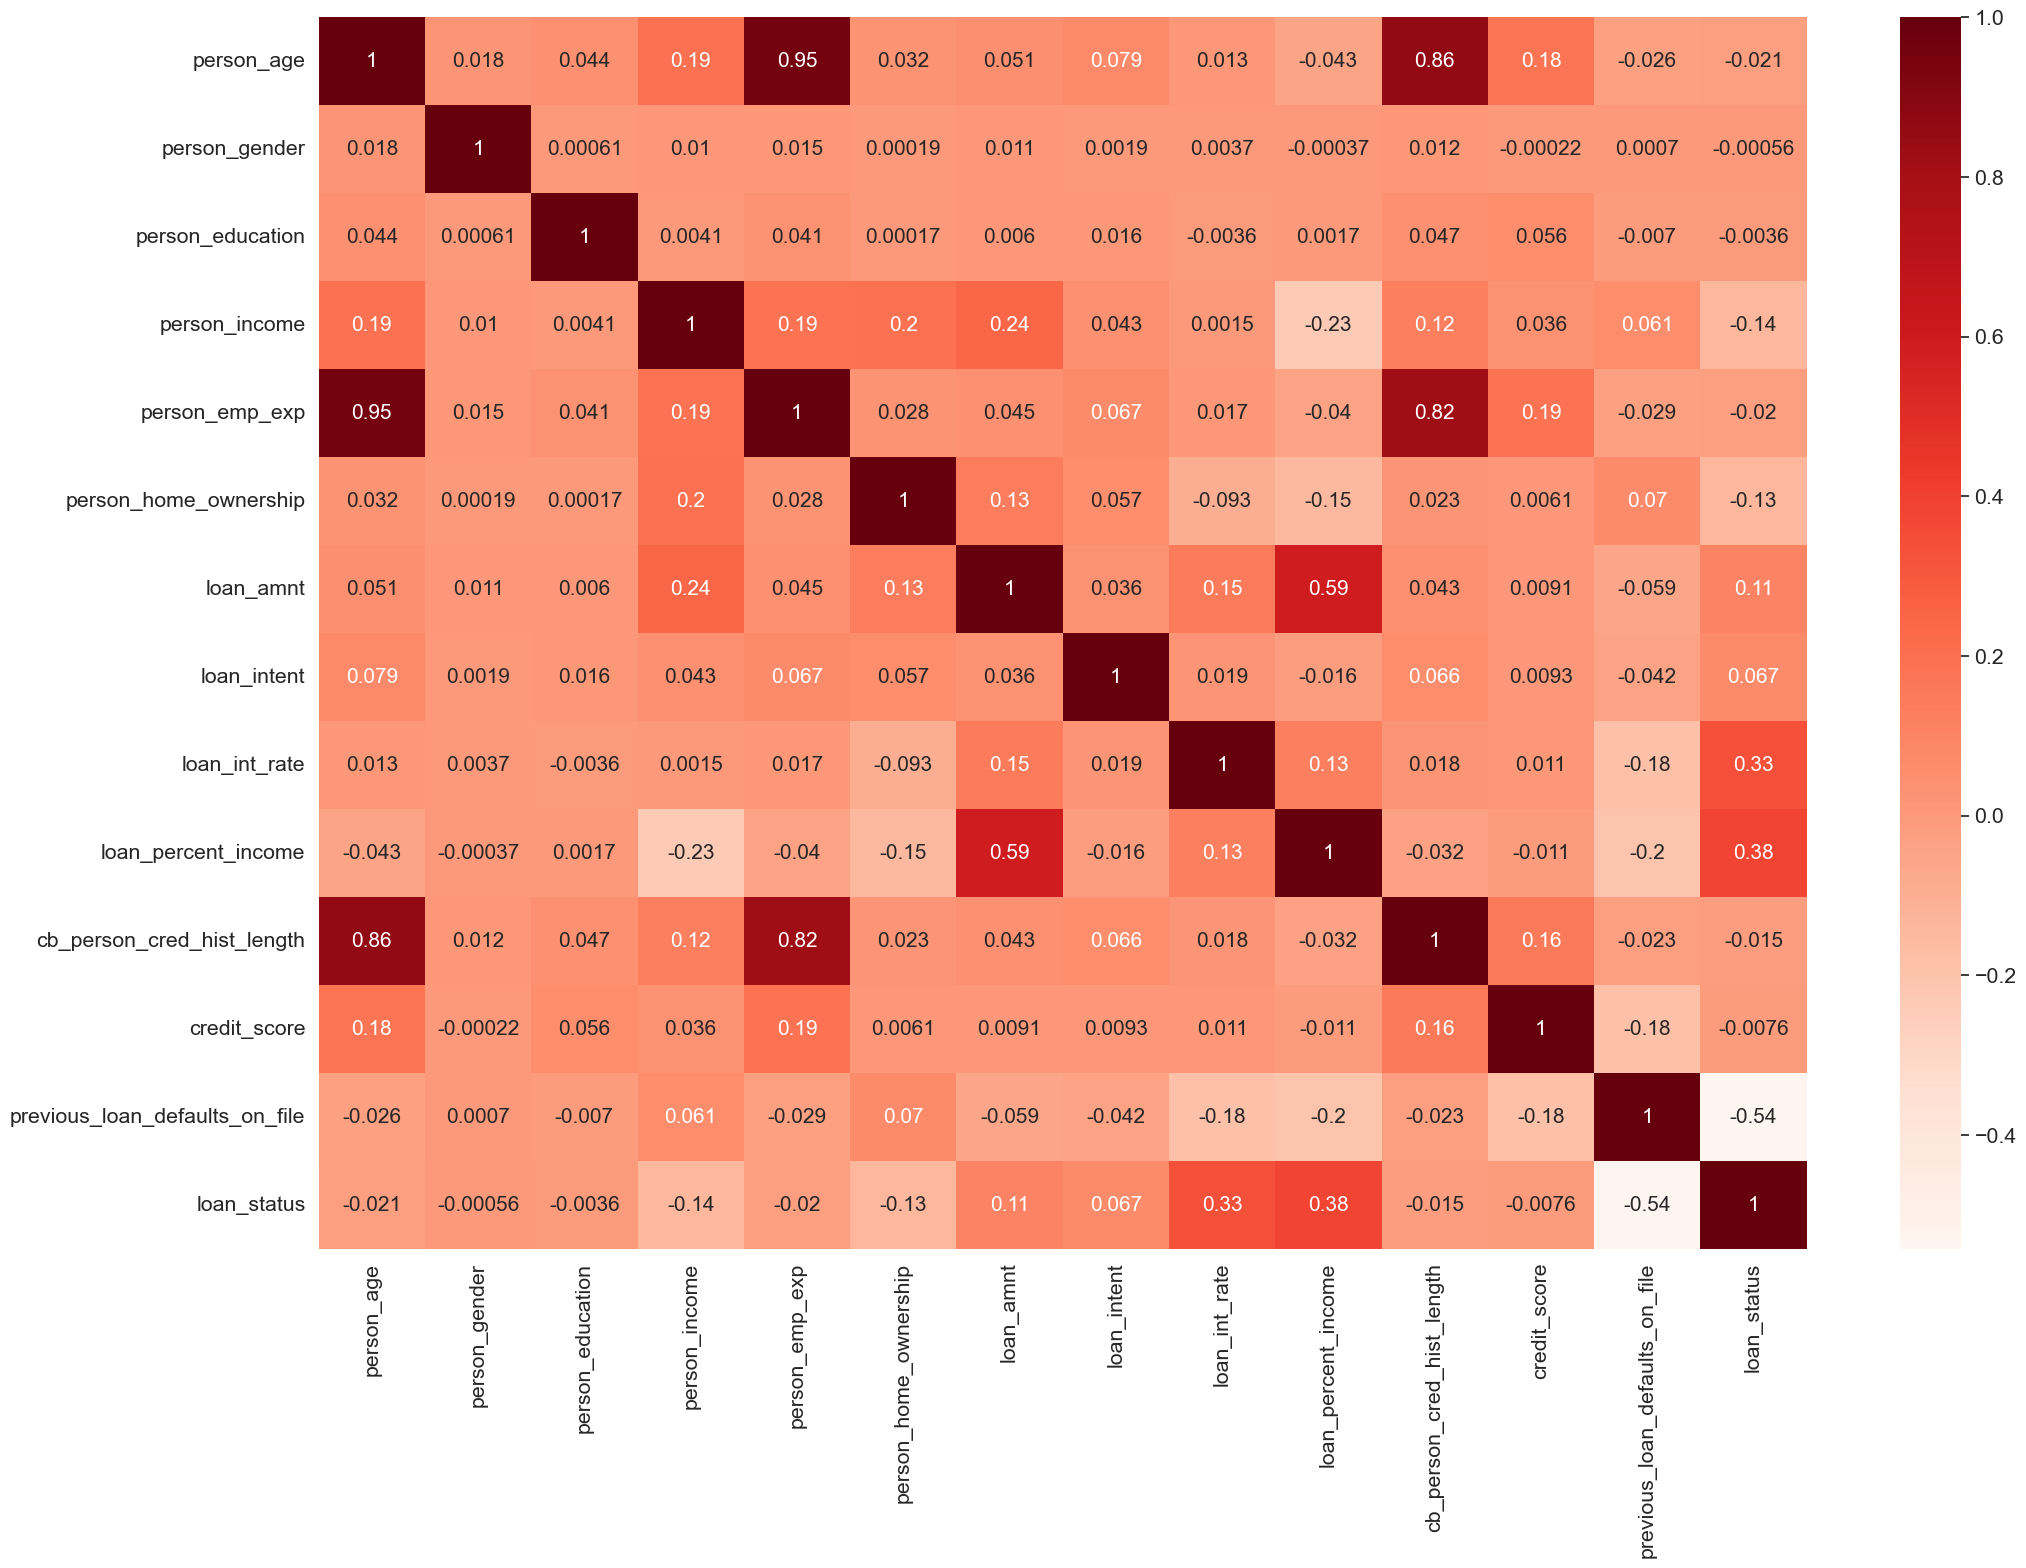

In [14]:
plt.figure(figsize=(24,16))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), cmap="Reds", annot=True, annot_kws={"size":15})
plt.show()

In [15]:
group1 = ["person_age", "person_emp_exp", "cb_person_cred_hist_length"]
group2 = ["loan_int_rate", "loan_percent_income", "loan_amnt"]
group3 = ["person_age", "person_emp_exp", "cb_person_cred_hist_length", "loan_percent_income", "loan_amnt"]

lista_grupos = [group1, group2, group3]

Coorelação do Grupo 1:




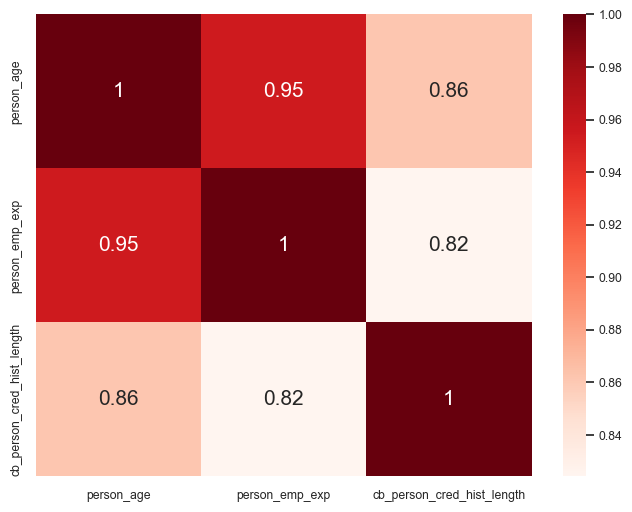

Coorelação do Grupo 2:




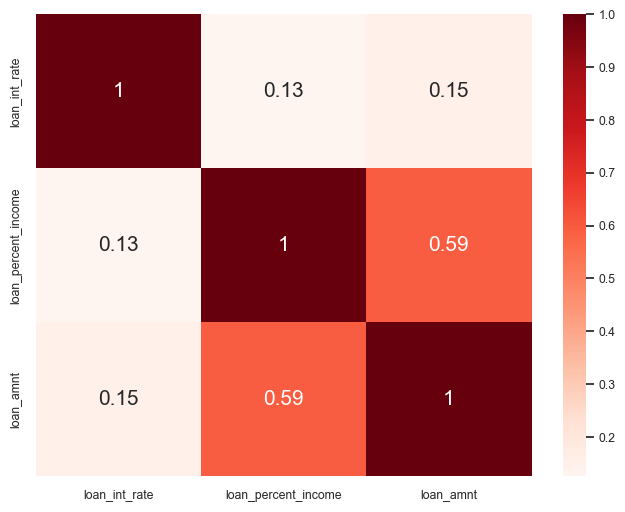

Coorelação do Grupo 3:




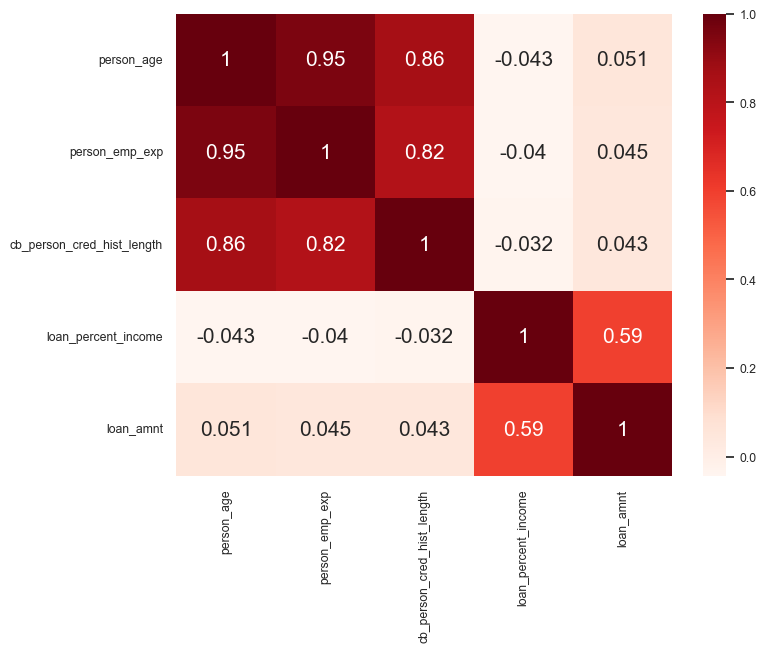

In [16]:
dfs_grupos = {}
for i, grupo in enumerate(lista_grupos, start=1):
    dfs_grupos[f'grupo_{i}'] = df[grupo].copy()
    print(f"Coorelação do Grupo {i}:")
    print("\n")
    plt.figure(figsize=(8,6))
    sns.set(font_scale=0.8)
    sns.heatmap(dfs_grupos[f'grupo_{i}'].corr(), cmap="Reds", annot=True, annot_kws={"size":15})
    plt.show()

## Modelos de Previsão e Classificação

### Previsão da taxa de juros do empréstimo

In [60]:
# Previsão de Taxa de Juros
X_loan_int_rate = df.drop(columns=['loan_int_rate'])
y_loan_int_rate = df['loan_int_rate']

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_loan_int_rate, y_loan_int_rate, test_size=0.3, random_state=42)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_lr, y_train_lr)
y_pred_lr = regressor.predict(X_test_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
{"Loan Interest Rate Prediction MSE": mse_lr}

{'Loan Interest Rate Prediction MSE': 6.894051046834075}

### Previsão de Score de Crédito

In [61]:
# Previsão de Score de Crédito
X_credit_score = df.drop(columns=['credit_score'])
y_credit_score = df['credit_score']

X_train_cs, X_test_cs, y_train_cs, y_test_cs = train_test_split(X_credit_score, y_credit_score, test_size=0.3, random_state=42)
regressor_cs = RandomForestRegressor(random_state=42)
regressor_cs.fit(X_train_cs, y_train_cs)
y_pred_cs = regressor_cs.predict(X_test_cs)
mse_cs = mean_squared_error(y_test_cs, y_pred_cs)
{"Credit Score Prediction MSE": mse_cs}

{'Credit Score Prediction MSE': 2422.1398492592593}

### Classificação do Status de Empréstimo

In [62]:
# Classificação do Status do Empréstimo
X_loan_status = df.drop(columns=['loan_status'])
y_loan_status = df['loan_status']

X_train_ls, X_test_ls, y_train_ls, y_test_ls = train_test_split(X_loan_status, y_loan_status, test_size=0.3, random_state=42)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_ls, y_train_ls)
y_pred_ls = classifier.predict(X_test_ls)
accuracy_ls = accuracy_score(y_test_ls, y_pred_ls)
{"Loan Status Classification Accuracy": accuracy_ls}

{'Loan Status Classification Accuracy': 0.9729629629629629}

## Clusterização dos Clientes

### Método do Cotovelo para encontrar o número ideal de clusters

c:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

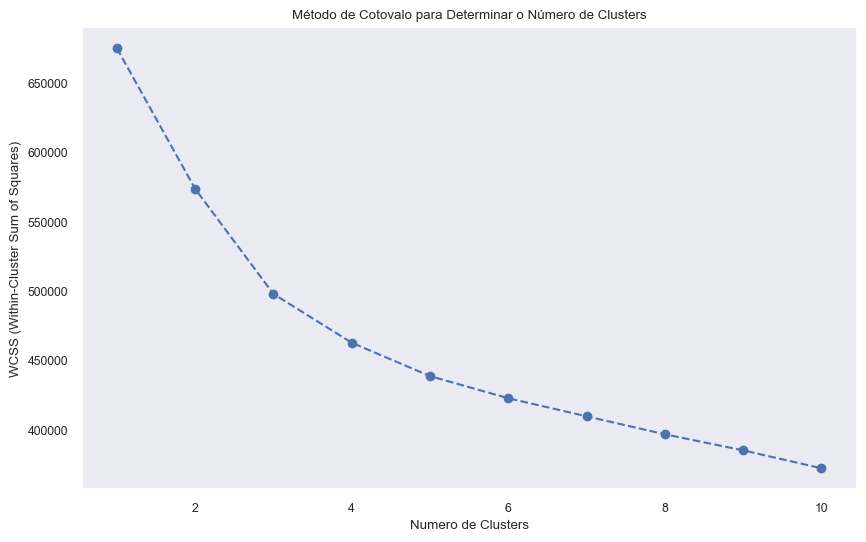

In [63]:
# Clusterização de Clientes
X_loan_intent = df.drop(columns=[col for col in df.columns if 'loan_intent_' in col])
y_loan_intent = df[[col for col in df.columns if 'loan_intent_' in col]]

X_cluster = df.copy()

# Standardizing for clustering
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Calcular WCSS para diferentes números de clusters
wcss = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot da Curva do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Método de Cotovalo para Determinar o Número de Clusters')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

### Clusterização

In [64]:
# Número de clusters ótimo baseado no método do cotovelo
optimal_clusters = 3 

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_cluster_scaled)
clusters = kmeans.labels_

# Cálculo do silhouette score
silhouette_avg = silhouette_score(X_cluster_scaled, clusters)
silhouette_avg

c:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.20276727371327388

### Visualização Gráfica dos Clusters

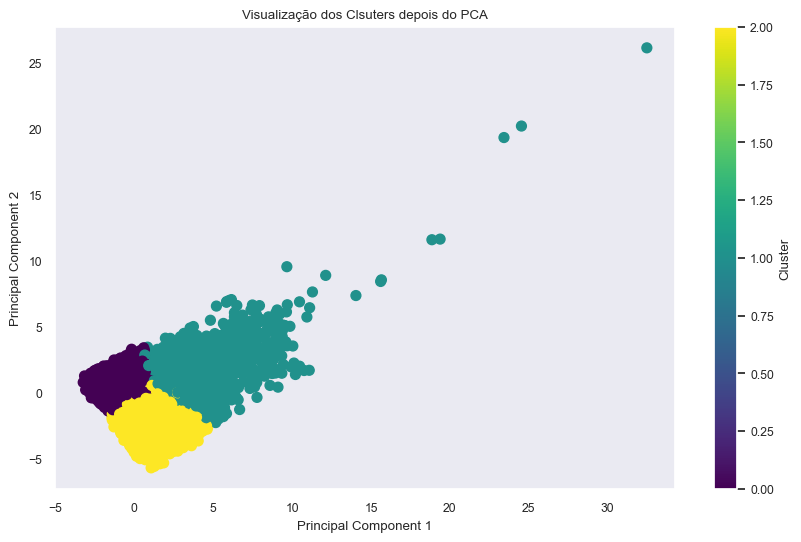

In [65]:
from sklearn.decomposition import PCA

# Reduzindo os dados para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Visualizando os clusters em 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Visualização dos Clsuters depois do PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


### Visualização dos Clusters

In [66]:
df['Cluster'] = clusters
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         person_age  person_gender  person_education  person_income  \
Cluster                                                               
0         25.978014       0.539591          1.690298   76354.379885   
1         39.505608       0.580328          1.860569  108383.421225   
2         26.121116       0.562901          1.710763   75835.455915   

         person_emp_exp  person_home_ownership     loan_amnt  loan_intent  \
Cluster                                                                     
0              3.642299               1.330110   7053.227402     2.040617   
1             17.115617               1.411217  10586.039862     2.431752   
2              3.749261               1.362339  13784.840747     2.418571   

         loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
Cluster                                                                   
0            10.196991             0.105820                    4.736994   
1            11.129895           